<a href="https://colab.research.google.com/github/Sowmya74/Hamoye_Intern/blob/main/DataScience_StageE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hamoye Stage E**

## **Practical Time Series Analysis & Forecast**

## **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


## **Data**

In [2]:
file_path = 'household_power_consumption.txt'
data = pd.read_csv(file_path, sep=';',
                   parse_dates={'datetime' : ['Date', 'Time']},
                   infer_datetime_format=True,
                   low_memory=False,
                   na_values=['nan','?'])


In [3]:
data.head(3)

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0


In [4]:
data.tail(3)

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075256,2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [5]:
data.shape

(2075259, 8)

In [6]:
data.describe()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

## **Null Values**

In [10]:
missing_values = data.isnull().sum()

In [11]:
total_entries = len(data)
missing_percentage = (missing_values / total_entries) * 100

# Display the percentage of missing values
print(missing_percentage)

datetime                 0.000000
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64


In [12]:
#Filling missing_values
data.fillna(method='ffill', inplace=True)

data.isnull().sum()


datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [13]:
hourly_data = data.resample('H', on='datetime')['Global_active_power'].sum()

In [14]:
hourly_data = hourly_data.reset_index()

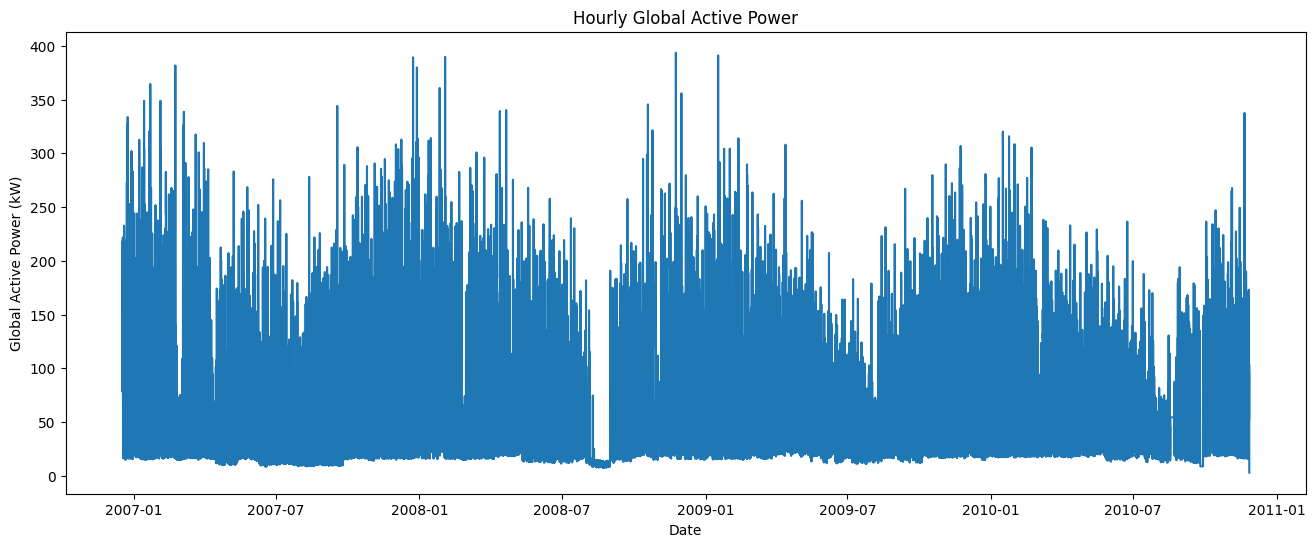

In [15]:
plt.figure(figsize=(16, 6))
plt.plot(hourly_data['datetime'], hourly_data['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.title('Hourly Global Active Power')
plt.show()

What is the Pearson correlation coefficient between the global_active_power and voltage? To 3 decimal places

In [16]:
power_voltage = data[['Global_active_power', 'Voltage']]

In [17]:
corr_matrix = power_voltage.corr()

In [18]:
power_voltage_corr = corr_matrix.iloc[0, 1]
print(f"Pearson correlation coefficient between global_active_power and voltage: {power_voltage_corr:.3f}")

Pearson correlation coefficient between global_active_power and voltage: -0.396


What is the Pearson correlation coefficient between the Voltage and global_intensity? To 2 decimal places.



In [19]:
voltage_power_corr = data[['Voltage', 'Global_intensity']].corr().iloc[0, 1]
print(f"Pearson correlation coefficient between Voltage and Global_intensity: {voltage_power_corr:.2f}")

Pearson correlation coefficient between Voltage and Global_intensity: -0.41


In [20]:
# Calculating active energy consumption for other appliances
data['total_active_energy'] = (data['Global_active_power'] * 1000 / 60) - data['Sub_metering_1'] - data['Sub_metering_2'] - data['Sub_metering_3']

In [21]:
data.head(3)

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,total_active_energy
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


In [22]:
data.total_active_energy.head(5)

0    52.266667
1    72.333333
2    70.566667
3    71.800000
4    43.100000
Name: total_active_energy, dtype: float64

In [23]:
#data.set_index('datetime', inplace=True)

In [24]:
daily_data = data.resample('D', on='datetime')['Global_active_power'].sum().reset_index()
daily_data.columns = ['ds', 'y']

In [25]:
# Resample data to daily frequency and sum the values
#data_daily = data.resample('D').sum()

In [26]:
daily_data.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


## **Splitting**

In [27]:
# Split the data into training and testing sets
train_data = daily_data.iloc[:-300]
test_data = daily_data.iloc[-300:]

print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (1142, 2)
Test Data Shape: (300, 2)


## **Univariate**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgt_svcf/gz78k38i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgt_svcf/rvdouvfs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64398', 'data', 'file=/tmp/tmpqgt_svcf/gz78k38i.json', 'init=/tmp/tmpqgt_svcf/rvdouvfs.json', 'output', 'file=/tmp/tmpqgt_svcf/prophet_modelq_m71nfo/prophet_model-20240619020420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


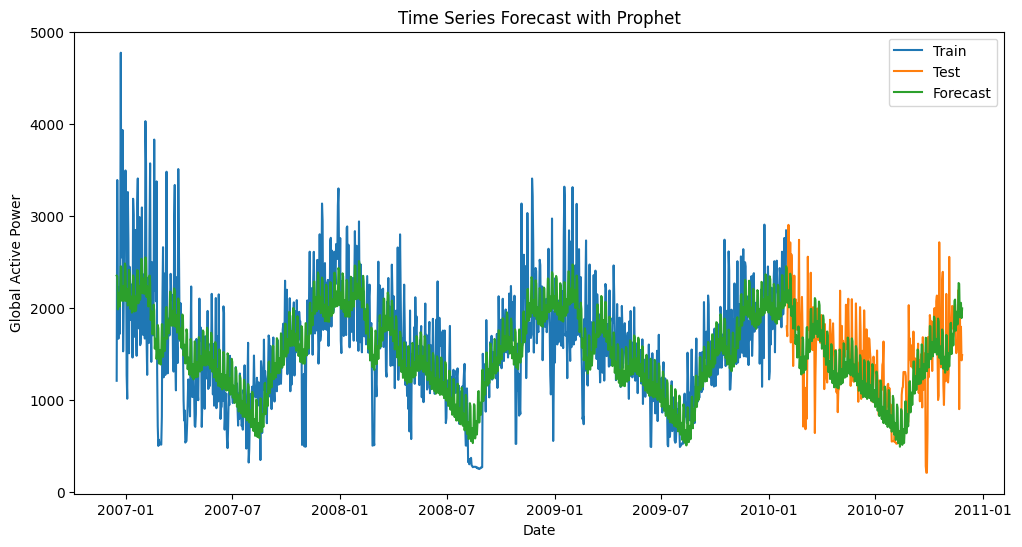

MAPE: 27.20%
MAE: 295.38
MSE: 161289.41
RMSE: 401.61


In [28]:
# Initialize Prophet model
uni_model = Prophet()
uni_model.fit(train_data)
future = uni_model.make_future_dataframe(periods=len(test_data), freq='D')
forecast = uni_model.predict(future)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_data['ds'], train_data['y'], label='Train')
ax.plot(test_data['ds'], test_data['y'], label='Test')
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Global Active Power')
ax.set_title('Time Series Forecast with Prophet')
plt.show()

# Evaluation metrics
y_true = test_data['y'].values
y_pred = forecast['yhat'].values[-len(test_data):]

mape = np.mean(np.abs(y_true - y_pred) / y_true) * 100
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

The day with the lowest weekly seasonality is: Tuesday


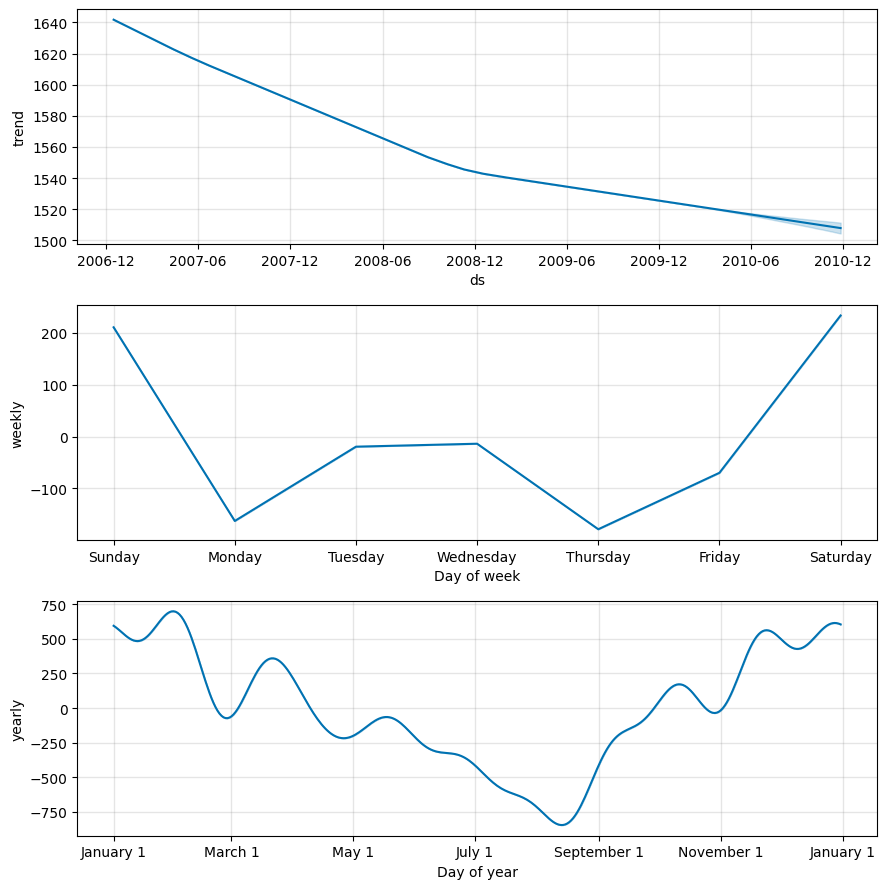

In [29]:
# Plot the forecast components
fig = uni_model.plot_components(forecast)

# Access the weekly seasonality component
weekly_seasonality = forecast['weekly'][forecast['weekly'].notna()]

# Find the index of the day with the lowest value
min_idx = weekly_seasonality.idxmin()

# Convert the index to a datetime object
min_day = pd.to_datetime(min_idx, unit='D', origin=pd.Timestamp('1970-01-01'))

# Get the day name
day_name = min_day.day_name()
print(f"The day with the lowest weekly seasonality is: {day_name}")

In [30]:
data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,total_active_energy
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


## **MultiVariate**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgt_svcf/8qgk10b3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgt_svcf/ebtnt7jt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66100', 'data', 'file=/tmp/tmpqgt_svcf/8qgk10b3.json', 'init=/tmp/tmpqgt_svcf/ebtnt7jt.json', 'output', 'file=/tmp/tmpqgt_svcf/prophet_modeluyj4hxbu/prophet_model-20240619020423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Train Data Shape: (1142, 9)
Test Data Shape: (300, 9)


02:04:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


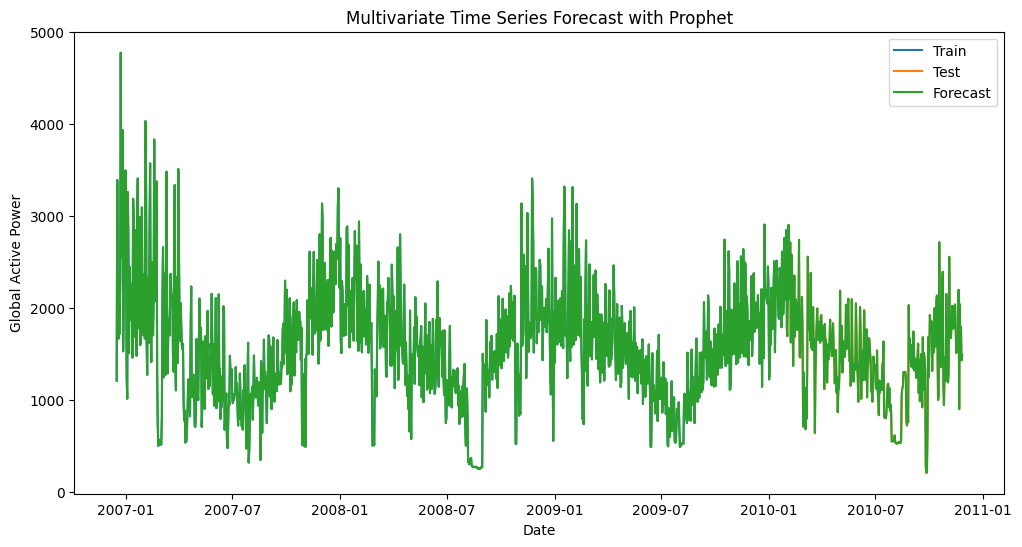

MAPE: 0.04%
MAE: 0.45
MSE: 0.25
RMSE: 0.50


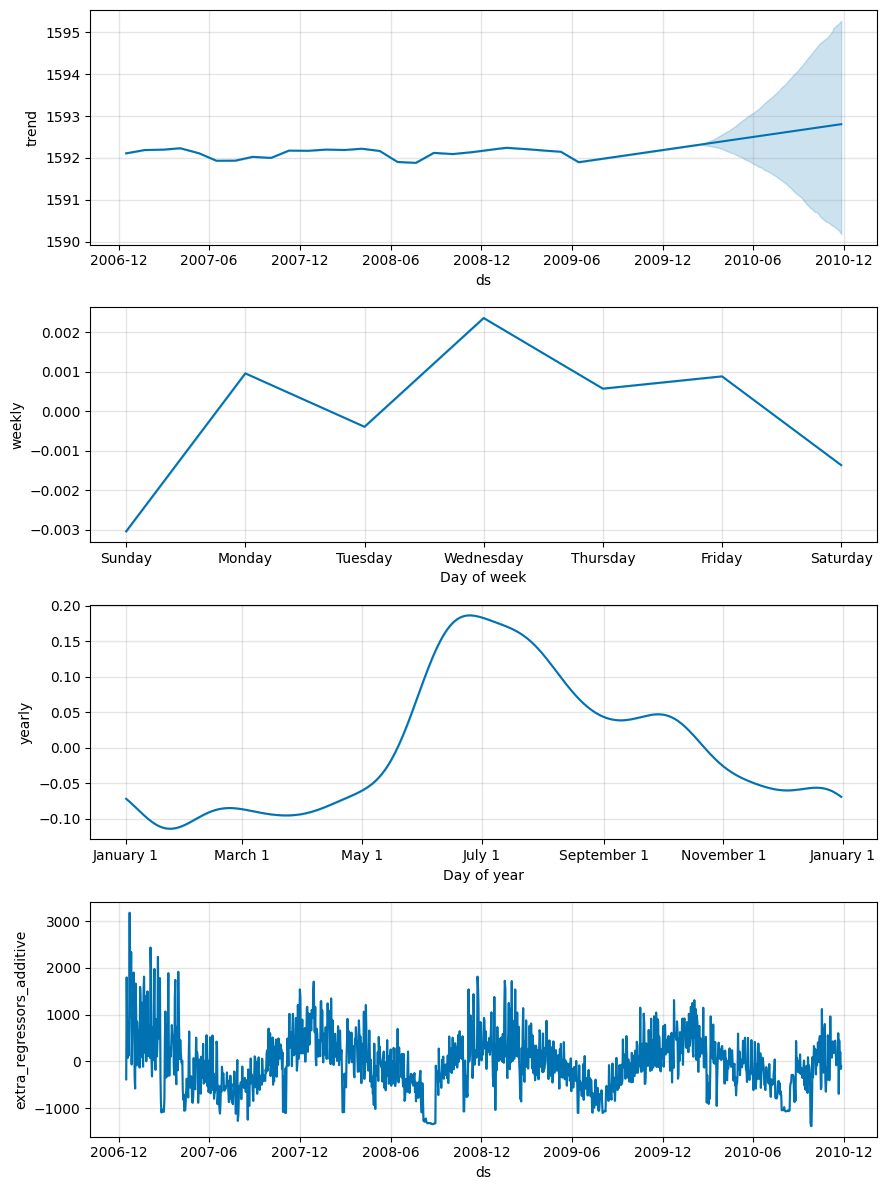

Day with lowest daily seasonality: Sunday
Month with lowest yearly seasonality: September


In [31]:
# Ensure datetime is the index for resampling
data.set_index('datetime', inplace=True)

# Resample to daily data
daily_data = data.resample('D').sum().reset_index()

# Prepare daily data with necessary columns
daily_data = daily_data[['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'total_active_energy']]
daily_data.columns = ['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6', 'add7']

# Split the data into training and testing sets
train_data = daily_data.iloc[:-300]
test_data = daily_data.iloc[-300:]

print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

# Initialize Prophet model
multi_model = Prophet()

# Add regressors
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.add_regressor('add3')
multi_model.add_regressor('add4')
multi_model.add_regressor('add5')
multi_model.add_regressor('add6')
multi_model.add_regressor('add7')

# Fit the model
multi_model.fit(train_data)

# Make future dataframe
future = multi_model.make_future_dataframe(periods=len(test_data), freq='D')
# Ensure future dataframe includes all regressors
future['add1'] = daily_data['add1']
future['add2'] = daily_data['add2']
future['add3'] = daily_data['add3']
future['add4'] = daily_data['add4']
future['add5'] = daily_data['add5']
future['add6'] = daily_data['add6']
future['add7'] = daily_data['add7']

# Predict
forecast = multi_model.predict(future)

# Plotting the forecast
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_data['ds'], train_data['y'], label='Train')
ax.plot(test_data['ds'], test_data['y'], label='Test')
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Global Active Power')
ax.set_title('Multivariate Time Series Forecast with Prophet')
plt.show()

# Evaluate performance
y_true = test_data['y'].values
y_pred = forecast.loc[forecast['ds'].isin(test_data['ds']), 'yhat'].values

mape = np.mean(np.abs(y_true - y_pred) / y_true) * 100
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

# Plotting components including daily and yearly seasonality
fig = multi_model.plot_components(forecast)
plt.show()

# Extract daily seasonality from components
daily_component = forecast[['ds', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']]
daily_component['daily'] = daily_component[['add1', 'add2', 'add3', 'add4', 'add5', 'add6']].sum(axis=1)

# Find the day with the lowest daily seasonality
min_daily_idx = daily_component['daily'].idxmin()
min_daily_day = daily_component.loc[min_daily_idx, 'ds'].day_name()

print(f"Day with lowest daily seasonality: {min_daily_day}")

# Extract yearly seasonality from components
yearly_component = forecast[['ds', 'add7']]
yearly_component.columns = ['ds', 'yearly']

# Find the month with the lowest yearly seasonality
min_yearly_idx = yearly_component['yearly'].idxmin()
min_yearly_month = yearly_component.loc[min_yearly_idx, 'ds'].strftime('%B')

print(f"Month with lowest yearly seasonality: {min_yearly_month}")
